In [33]:
#Import Libraries
import texthero as hero
import pandas as pd
import numpy as np
import nltk
import spacy
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords       
from nltk.stem import WordNetLemmatizer   

import pandas as pd
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
import gensim
from gensim import corpora, models
from nltk.corpus import stopwords
import re
import nltk
import string
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sidhartha.sahu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [34]:
#Load Dataset
Papers = pd.read_csv('Repair.csv', encoding='cp1252')
Papers.head()

Text
0  quick & efficient service without having to al...
1                            great customer service!
2          the help was timely and much appreciated!
3  i get solutions if a glitch comes up and a goo...
4  service is what keeps me around. great custome...

In [35]:
#Show only top 5 rows
news_content = Papers[["Text"]]
news_content.head()

Text
0  quick & efficient service without having to al...
1                            great customer service!
2          the help was timely and much appreciated!
3  i get solutions if a glitch comes up and a goo...
4  service is what keeps me around. great custome...

In [36]:
# clean the news content by using clean method from hero package
news_content['clean_content'] = hero.clean(news_content['Text'])

In [37]:
#show unclean and clean news content
news_content.tail()

Text  \
10235                because your agent just disappeared   
10236  left chat in middle of service,  no credit or ...   
10237  2 customer service agents hung up on me then p...   
10238                         farted around  do your job   
10239  angry abusive poor agent not helpful for me ve...   

                                           clean_content  
10235                                  agent disappeared  
10236         left chat middle service credit resolution  
10237    customer service agents hung passed anyone else  
10238                                  farted around job  
10239  angry abusive poor agent helpful disappointing...

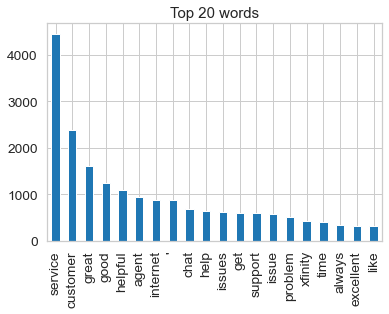

In [38]:
import matplotlib.pyplot as plt
NUM_TOP_WORDS = 20 
top_20 = hero.visualization.top_words(news_content['clean_content']).head(NUM_TOP_WORDS)
# Draw the bar chart
top_20.plot.bar(rot=90, title="Top 20 words");
plt.show(block=True)

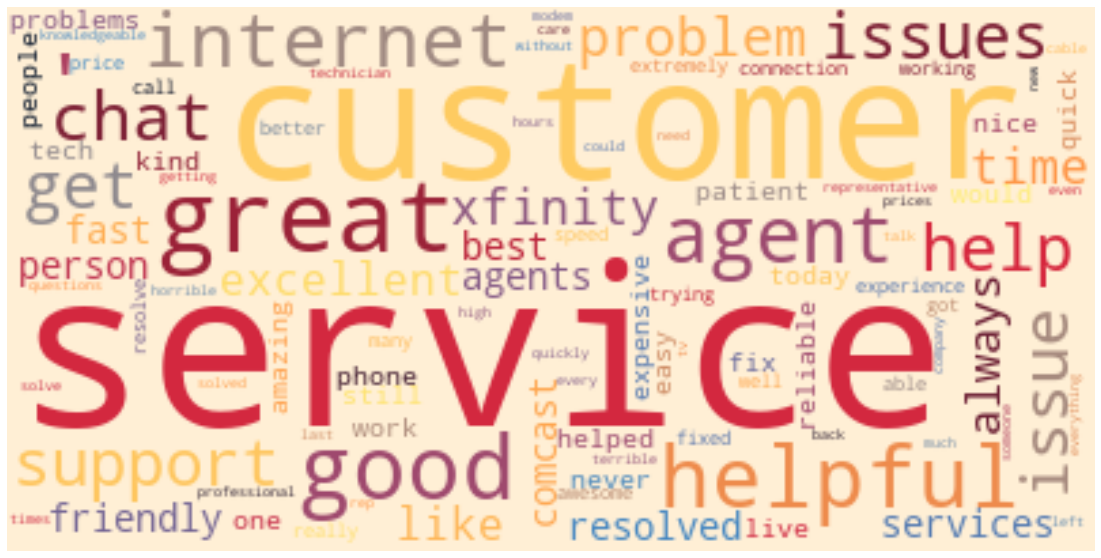

In [39]:
hero.wordcloud(news_content.clean_content, max_words=100,)

In [40]:
#Create New Panda series
column_names = ["content","tfidf", "kmeans_labels"]
news = pd.DataFrame(columns = column_names)

In [41]:
# collect clean content.
news["content"] = news_content.clean_content[:10240]# convert them into tf-idf features.
news['tfidf'] = (news['content'].pipe(hero.tfidf))# perform clustering algorithm by using kmeans() 
news['kmeans_labels'] = (news['tfidf'].pipe(hero.kmeans, n_clusters=5).astype(str))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:932: FutureWarning:

'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning:

'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.



In [42]:
# show content and their labels
news[["content","kmeans_labels"]].tail(20)

content kmeans_labels
10220  incompetent agents bad service keeps dropping ...             3
10221  expensive plus equipment fees plus misc fees p...             3
10222                provide services pay local monopoly             3
10223             agent never responded back still issue             3
10224                                  didnt fix problem             3
10225  advised billing due cancelling service phone x...             3
10226                                        ' fix shout             3
10227                        dont service agent named su             3
10228             left middle chat service still working             3
10229                            virtually human support             3
10230               cannot seem get quality support help             4
10231                                            helping             3
10232                 got absolutely help waited minutes             4
10233  spend lot time tech support help possibly make...             3
10234             cause happened past days bs whole load             3
10235                                  agent disappeared             3
10236         left chat middle service credit resolution             3
10237    customer service agents hung passed anyone else             3
10238                                  farted around job             3
10239  angry abusive poor agent helpful disappointing...             3

In [43]:
news.head()

content  \
0  quick efficient service without always call   
1                       great customer service   
2                 help timely much appreciated   
3      get solutions glitch comes good service   
4  service keeps around great customer service   

                                               tfidf kmeans_labels  
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...             3  
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...             0  
2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...             4  
3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...             3  
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...             0

In [44]:
news.to_excel( r'D:\Dropbox (eClerx Services Ltd.)\Sidhartha data\Documents\CO\contri.xlsx',
                  sheet_name= 'kmeanscontri'
                )

In [12]:
#perform pca
news['pca'] = news['tfidf'].pipe(hero.pca)#show scatterplot
hero.scatterplot(news, 'pca', color='kmeans_labels', title="news")

In [13]:
from wordcloud import WordCloud

In [14]:
Long_string = ','.join(list(news_content['clean_content'].values))

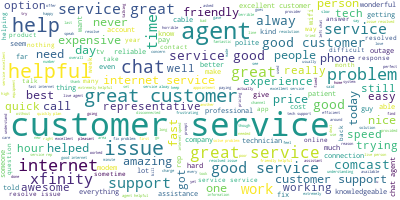

In [15]:
wordcloud = WordCloud(background_color = "white", max_words = 1000, contour_width = 3, contour_color = "steelblue")
wordcloud.generate(Long_string)
wordcloud.to_image()

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [17]:
# Define a function to print 10 most common words

def plot_10_most_common_words(count_data, count_vectorizer):
    words= count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts += t.toarray()[0]
        
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key = lambda x:x[1], reverse = True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words))
    
    plt.figure(2, figsize = (15, 15/1.6180))
    plt.subplot(title = '10 most common words')
    sns.set_context("notebook", font_scale = 1.25, rc = {"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette = 'husl')
    plt.xticks(x_pos, words, rotation = 90)
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show() 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



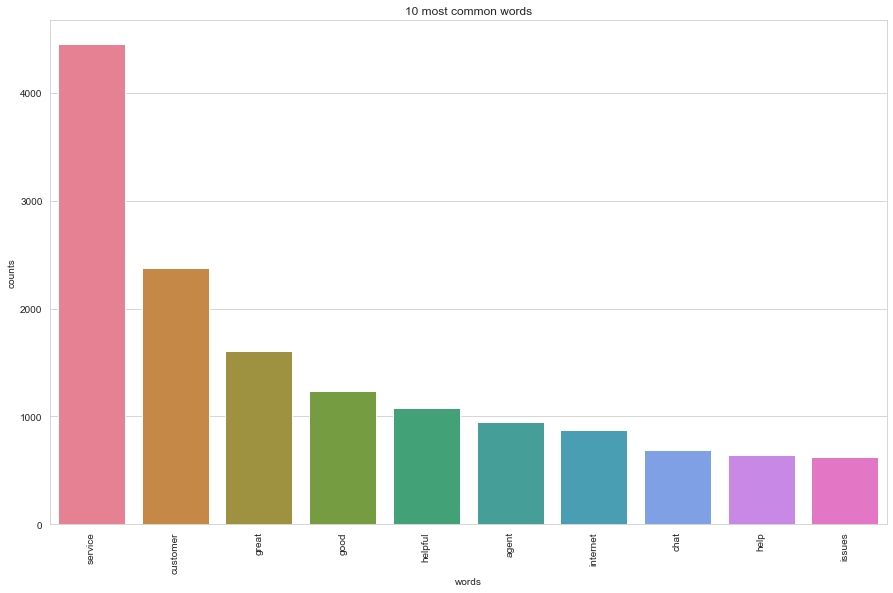

In [18]:
count_vectorizer = CountVectorizer(stop_words = 'english')
count_data = count_vectorizer.fit_transform(news_content['clean_content'])
plot_10_most_common_words(count_data, count_vectorizer)

In [20]:
#LDA Model training
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

from sklearn.decomposition import LatentDirichletAllocation as LDA

def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTpoic #%d:" % topic_idx)
        print(" ".join(words[i]
                      for i in topic.argsort()[:-n_top_words - 1:-1]))
        
number_topics = 5
number_words = 5

lda = LDA(n_components = number_topics)
lda.fit(count_data)

print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Tpoic #0:
helpful agent issue problem help

Tpoic #1:
service great customer excellent internet

Tpoic #2:
chat internet phone time person

Tpoic #3:
service good customer internet support

Tpoic #4:
issues quick help long support
